Mean of omega1:  [3. 6.]
Mean of omega2:  [ 3. -2.]
Covariance of omega1:  [[2.66666667 0.        ]
 [0.         2.66666667]]
Covariance of omega2:  [[2.66666667 0.        ]
 [0.         2.66666667]]


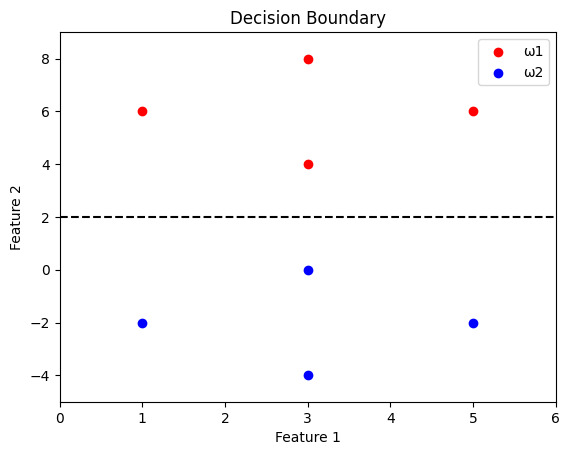

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
omega1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# Step 1: Compute mean vectors and covariance matrices
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
print('Mean of omega1: ', mean_omega1)
print('Mean of omega2: ', mean_omega2)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
print('Covariance of omega1: ', cov_omega1)
print('Covariance of omega2: ', cov_omega2)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)

w = np.dot(mean_omega1,inv_cov_omega1 )- np.dot(mean_omega2, inv_cov_omega2)
w0 = -0.5 * (np.dot(np.dot(mean_omega1, inv_cov_omega1), mean_omega1) - np.dot(np.dot(mean_omega2, inv_cov_omega2), mean_omega2))

# Step 3: Generate mesh grid
x_min, x_max = min(omega1[:, 0].min(), omega2[:, 0].min()) - 1, max(omega1[:, 0].max(), omega2[:, 0].max()) + 1
y_min, y_max = min(omega1[:, 1].min(), omega2[:, 1].min()) - 1, max(omega1[:, 1].max(), omega2[:, 1].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


# Step 4: Plot data points and decision boundary
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')

# Compute decision boundary
zz = w[0]*xx + w[1]*yy + w0


plt.contour(xx, yy, zz, levels=[0], colors='black', linestyles='dashed')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.show()
